# Rolling windows mean function

In [1]:
# import used packages
import numpy as np

# Set jupyter display in full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Import Matplotlib pyplot package to visualize data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Generate data following normal distribution
n = 10000 # number of generated points
mu = 0    # Mean of the distribution
sig = 1   # Standard deviation from the mean

# Generate data
data = np.random.normal(mu, sig, n)

In [3]:
# Rolling mean
def rollingMean(X, win=2):
    # Initialize mean list with numpy NaN variables (according to the size of the windows)
    mean = [np.nan for i in range(win-1)]

    # Loop over X to compute means and fill mean dict. Be carefull with the loop start and stop
    for i in range(win, len(X)+1):
        mean.append(X[i-win:i].mean())

    # Return numpy array with mean values. !! SHALL HAVE SAME DIMENSIONS AS INPUT X !!
    return np.array(mean)

In [4]:
# Use Rolling mean fonction on data
windows = 100
means = rollingMean(data, windows)

In [5]:
# Check means shape is same as data
if means.shape == data.shape:
    print("Means array has the same shape as data")
else:
    print("Erro: Means array has not the same shape as data")

Means array has the same shape as data


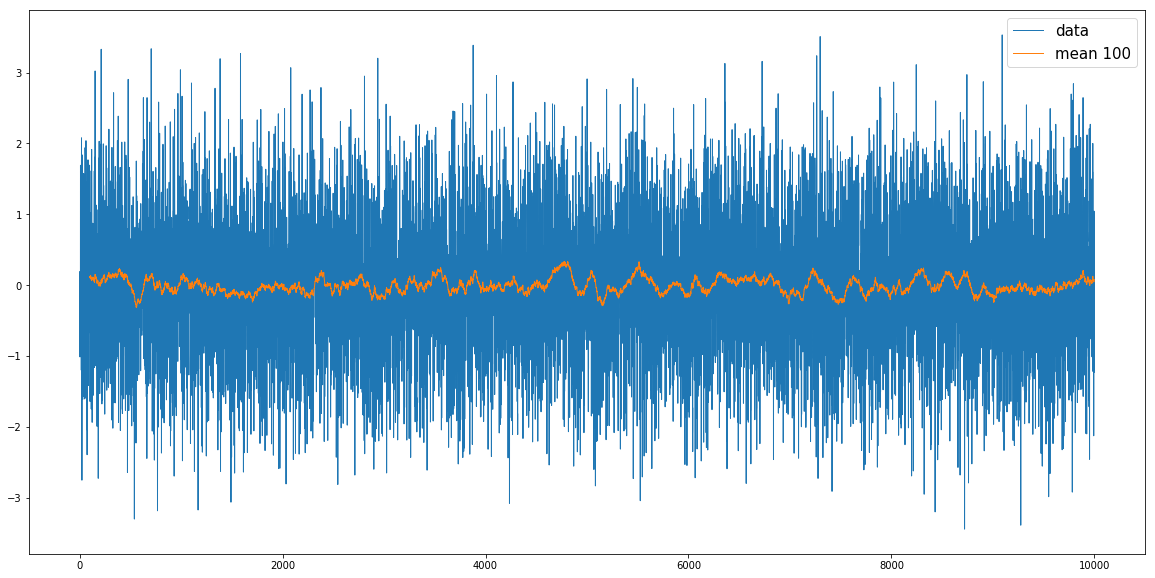

In [6]:
# Display results using matplotlib
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(data, '-', lw=1, label="data")
plt.plot(means, '-', lw=1, label="mean {}".format(windows))

plt.legend(fontsize=15);

## Rolling mean with center option

In [7]:
# Rolling mean with centering option
#   e.g. instead of given the mean value of X point at the location of the Xth point, 
#        center (round) the mean value in the current windows

def rollingMeanWithCentering(X, win=2, centering=False):
    # Initialize mean list with numpy NaN variables (according to the size of the windows and centering option)
    initRange = win - 1
    if centering:
        initRange = initRange // 2
    mean = [np.nan for i in range(initRange)]

    # Loop over X to compute means and fill mean dict. Be carefull with the loop start and stop
    for i in range(win, len(X)+1):
        mean.append(X[i-win:i].mean())
        
    # fill last missing value of mean list with NaN
    mean.extend([np.nan for i in range(len(X) - len(mean))])

    # Return numpy array with mean values. !! SHALL HAVE SAME DIMENSIONS AS INPUT X !!
    return np.array(mean)

In [8]:
# Use new rolling mean function with center option True and False
windows = 4
meansCentered = rollingMeanWithCentering(data, windows, True)
meansUncentered = rollingMeanWithCentering(data, windows, False)

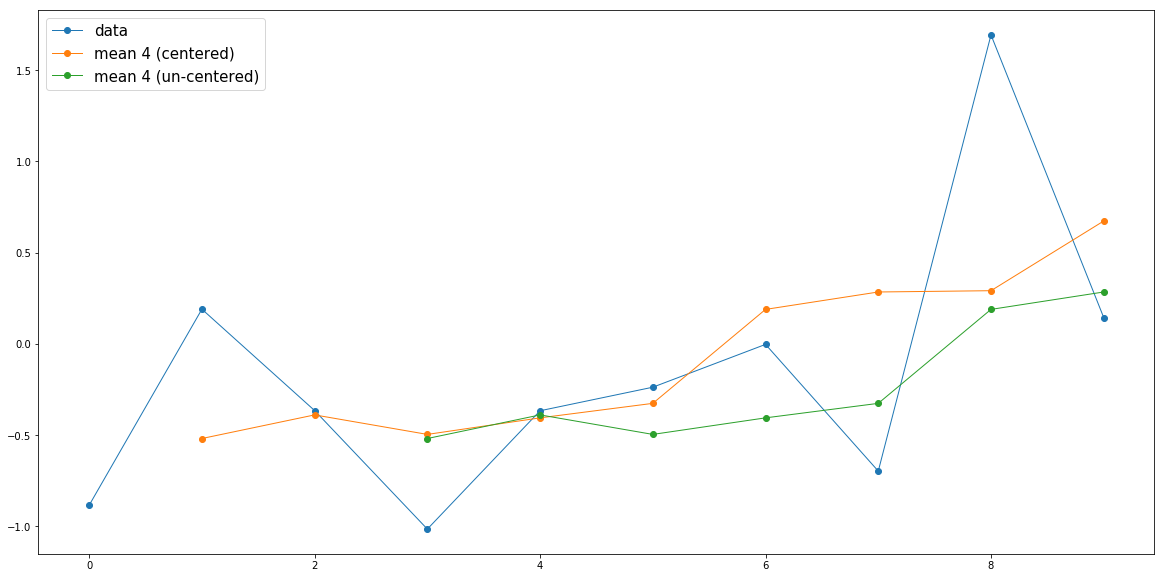

In [9]:
# Display 10th points using matplotlib
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(data[:10], 'o-', lw=1, label="data")
plt.plot(meansCentered[:10], 'o-', lw=1, label="mean {} (centered)".format(windows))
plt.plot(meansUncentered[:10], 'o-', lw=1, label="mean {} (un-centered)".format(windows))

plt.legend(fontsize=15);